# Analisis Tren Penggunaan Password Umum pada Dataset RockYou

## Pendahuluan

Di era digital saat ini, keamanan informasi menjadi isu yang sangat krusial. Salah satu aspek terpenting dalam menjaga keamanan akun adalah penggunaan password yang kuat dan unik. Sayangnya, banyak pengguna masih menggunakan password yang lemah, mudah ditebak, atau bahkan terlalu umum, sehingga meningkatkan risiko terjadinya serangan siber seperti brute force dan credential stuffing.

Dataset **RockYou** merupakan salah satu dataset publik yang berisi jutaan password yang bocor dari sebuah insiden kebocoran data besar. Dataset ini sering digunakan dalam penelitian keamanan siber untuk memahami pola perilaku pengguna dalam membuat password. Dengan melakukan **Exploratory Data Analysis (EDA)** pada dataset ini, kita dapat menemukan pola penggunaan password yang umum, tren panjang password, serta seberapa banyak pengguna yang masih memilih password sederhana.

Tujuan dari analisis ini adalah untuk:
- Mengidentifikasi password paling populer yang digunakan pengguna.
- Melihat distribusi panjang password.
- Menganalisis karakteristik password (apakah terdiri dari huruf, angka, simbol, atau kombinasi).
- Memberikan insight terkait kebiasaan pengguna dalam memilih password, serta implikasinya terhadap keamanan siber.

Melalui analisis ini, diharapkan dapat diperoleh gambaran mengenai kelemahan pola penggunaan password masyarakat, sehingga dapat menjadi dasar penting bagi edukasi pengguna maupun pengembangan kebijakan keamanan password yang lebih kuat.


In [ ]:
# 1. Mount Google Drive


from google.colab import drive
try:
  drive.mount('/content/drive/', force_remount=True)
  print("Google Drive mounted successfully!")
except Exception as e:
  print(f"Error mounting Google Drive: {e}")
  print("Please re-run this cell and follow the prompts to re-authenticate.")

Mounted at /content/drive/
Google Drive mounted successfully!


In [ ]:
# import requirements library
# mengolah dataset
import pandas as pd

# perhitungan matematis
import numpy as np

# membuat grafik
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load dataset
data = pd.read_csv("/content/drive/MyDrive/StatProb EDA/dataset.csv")

# **MENGETAHUI STRUKTUR DAN ISI DATA**

In [ ]:
# melihat sekilas data 5 row pertama
data.head()

,password,strength,length,class_strength,entropy,crack_time_sec,crack_time
0,bybee,0.088053,5,Very week,11.60964,1.562500e-06,instant
1,n3m0,0.088889,4,Very week,8.00000,1.280000e-07,instant
2,2509,0.088889,4,Very week,8.00000,1.280000e-07,instant
3,4622,0.070443,4,Very week,8.00000,1.280000e-07,instant
4,shrk,0.088889,4,Very week,8.00000,1.280000e-07,instant


In [ ]:
# mendapatkan info dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   password        100000 non-null  object 
 1   strength        100000 non-null  float64
 2   length          100000 non-null  int64  
 3   class_strength  100000 non-null  object 
 4   entropy         100000 non-null  float64
 5   crack_time_sec  100000 non-null  float64
 6   crack_time      100000 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 5.3+ MB


In [ ]:
# menghapus data duplikat
data_bersih = data.drop_duplicates()
data_bersih

,password,strength,length,class_strength,entropy,crack_time_sec,crack_time
0,bybee,0.088053,5,Very week,11.609640,1.562500e-06,instant
1,n3m0,0.088889,4,Very week,8.000000,1.280000e-07,instant
2,2509,0.088889,4,Very week,8.000000,1.280000e-07,instant
3,4622,0.070443,4,Very week,8.000000,1.280000e-07,instant
4,shrk,0.088889,4,Very week,8.000000,1.280000e-07,instant
...,...,...,...,...,...,...,...
24995,sifelizestasdecirmeloquerras,0.932150,28,Very strong,134.605938,1.657276e+31,Eternity
24996,iwillalwayslovemyboyfriend,0.915039,26,Very strong,122.211433,3.078060e+27,Eternity
24997,letsyouupdateyourfunNotesandmore,0.956727,32,Very strong,160.000000,7.307508e+38,Eternity
24998,chocolatesoeusi912134741,0.900241,24,Very strong,110.039100,6.668679e+23,Eternity


In [ ]:
# menghitung outliers
Q1 = data_bersih["length"].quantile(0.25)
Q2 = data_bersih["length"].quantile(0.5)
Q3 = data_bersih["length"].quantile(0.75)
print("Q1:", Q1)
print("Q3:", Q3)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

outliers_iqr = data_bersih[(data_bersih["length"] < lower_bound) | (data_bersih["length"] > upper_bound)]

print("\nNormal:")
print(len(data_bersih) - len(outliers_iqr))

print("\nOutliers (IQR):")
print(len(outliers_iqr))

Q1: 8.0
Q3: 17.0
Lower Bound: -5.5
Upper Bound: 30.5

Normal:
24463

Outliers (IQR):
537


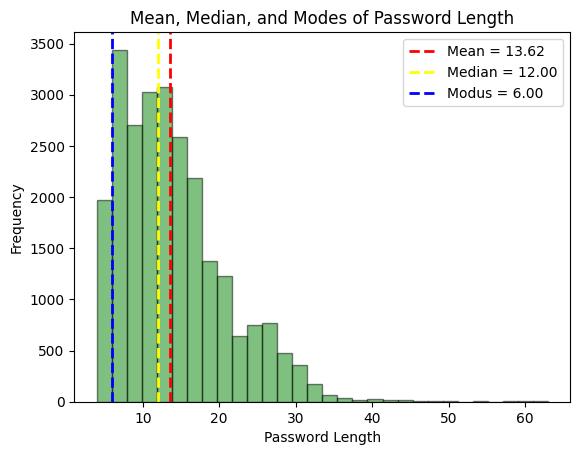

In [ ]:
plt.hist(data_bersih["length"], bins=30, edgecolor='black', alpha=0.5, color='green')

mean_value = data_bersih["length"].mean()
plt.axvline(x=mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_value:.2f}')
median_val = data_bersih["length"].median()
plt.axvline(x=median_val, color='yellow', linestyle='dashed', linewidth=2, label=f'Median = {median_val:.2f}')
modes_val = data_bersih["length"].mode()
for i in range(len(modes_val)):
    plt.axvline(x=modes_val[i], color='blue', linestyle='dashed', linewidth=2, label=f'Modus = {modes_val[i]:.2f}')


plt.xlabel('Password Length')
plt.ylabel('Frequency')
plt.title('Mean, Median, and Modes of Password Length')

plt.legend()

plt.show()

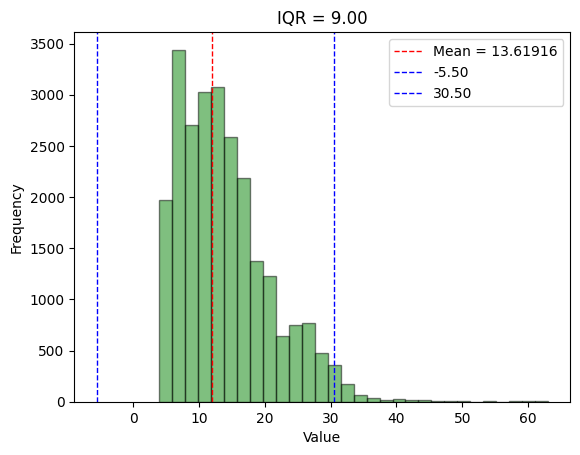

In [ ]:
plt.hist(data_bersih["length"], bins=30, edgecolor='black', alpha=0.5, color='green')

plt.axvline(x=Q2, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_value}')
plt.axvline(x=lower_bound, color='blue', linestyle='dashed', linewidth=1, label=f'{lower_bound:.2f}')
plt.axvline(x=upper_bound, color='blue', linestyle='dashed', linewidth=1, label=f'{upper_bound:.2f}')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'IQR = {IQR:.2f}')

plt.legend()

plt.show()

pw_type
alphanumeric       11988
alpha               9411
numeric             2768
contains_symbol      833
Name: count, dtype: int64


/tmp/ipython-input-4108484009.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bersih["pw_type"] = data_bersih["password"].astype(str).apply(classify_password)
/tmp/ipython-input-4108484009.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dist_tipe.index, y=dist_tipe.values, palette="viridis")


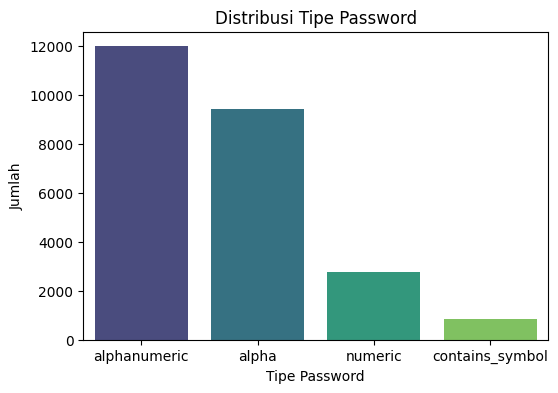

In [ ]:
# Membuat kolom kategori tipe password
import re

def classify_password(p):
    if pd.isna(p) or p == "":
        return "empty"
    if re.fullmatch(r"\d+", p):
        return "numeric"           # hanya angka
    if re.fullmatch(r"[A-Za-z]+", p):
        return "alpha"             # hanya huruf
    if re.search(r"[^A-Za-z0-9]", p):
        return "contains_symbol"   # ada simbol/karakter spesial
    if re.search(r"[A-Za-z]", p) and re.search(r"\d", p):
        return "alphanumeric"      # kombinasi huruf + angka
    return "other"

data_bersih["pw_type"] = data_bersih["password"].astype(str).apply(classify_password)

# Hitung distribusi
dist_tipe = data_bersih["pw_type"].value_counts()
print(dist_tipe)

# Visualisasi distribusi
plt.figure(figsize=(6,4))
sns.barplot(x=dist_tipe.index, y=dist_tipe.values, palette="viridis")
plt.title("Distribusi Tipe Password")
plt.xlabel("Tipe Password")
plt.ylabel("Jumlah")
plt.show()


/tmp/ipython-input-1141171432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_bersih, x="pw_type", y="crack_time_sec", palette="viridis")


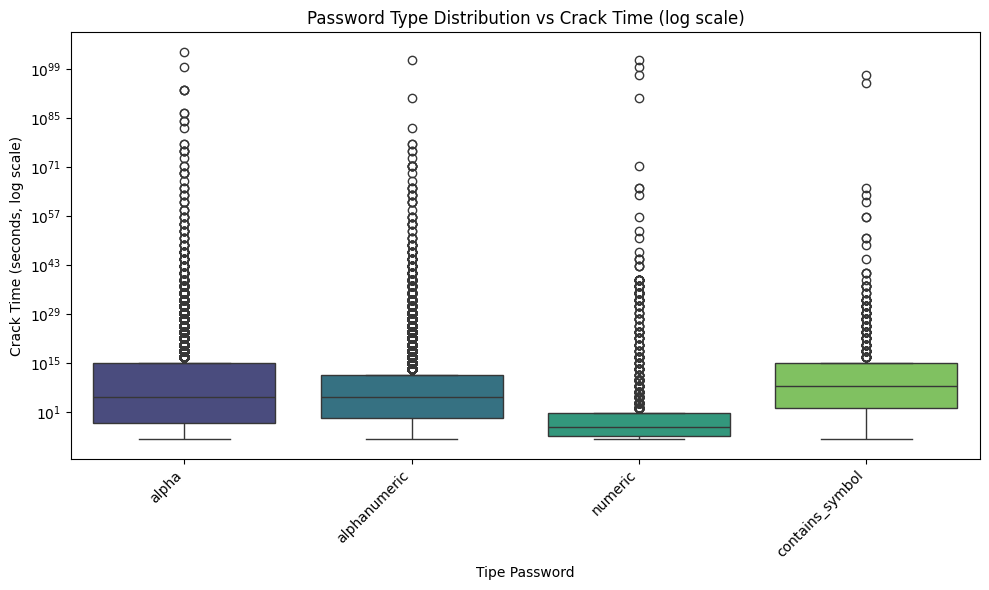

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_bersih, x="pw_type", y="crack_time_sec", palette="viridis")
plt.yscale("log")  # Gunakan skala log karena crack time sangat bervariasi
plt.title("Password Type Distribution vs Crack Time (log scale)")
plt.xlabel("Tipe Password")
plt.ylabel("Crack Time (seconds, log scale)")
plt.xticks(rotation=45, ha="right") # Putar label sumbu x agar tidak tumpang tindih
plt.tight_layout() # Sesuaikan layout
plt.show()

/tmp/ipython-input-3774372322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bersih["length_as_string"] = data_bersih["password"].astype(str).apply(len)


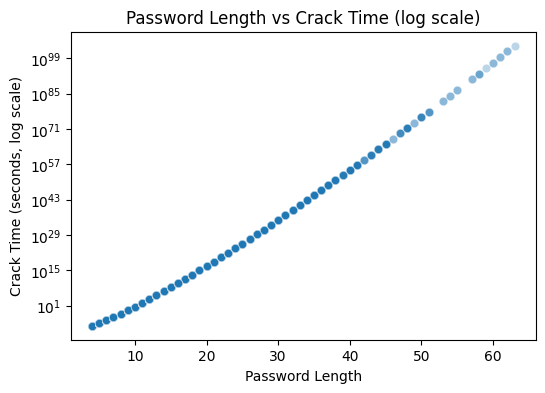

Pearson correlation: 0.04447472864339222
Spearman correlation: 1.0


In [ ]:
# Pastikan kolom tersedia
if "crack_time_sec" in data_bersih.columns:
    # Tambah kolom panjang password
    data_bersih["length_as_string"] = data_bersih["password"].astype(str).apply(len)

    # Scatter plot panjang vs crack_time_sec (log scale biar lebih jelas)
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        data=data_bersih,
        x="length_as_string",
        y="crack_time_sec",
        alpha=0.3
    )
    plt.yscale("log")  # crack time biasanya sangat besar → pakai log
    plt.title("Password Length vs Crack Time (log scale)")
    plt.xlabel("Password Length")
    plt.ylabel("Crack Time (seconds, log scale)")
    plt.show()

    # Hitung korelasi (Pearson & Spearman)
    pearson_corr = data_bersih["length_as_string"].corr(data_bersih["crack_time_sec"], method="pearson")
    spearman_corr = data_bersih["length_as_string"].corr(data_bersih["crack_time_sec"], method="spearman")
    print("Pearson correlation:", pearson_corr)
    print("Spearman correlation:", spearman_corr)
else:
    print("Kolom 'crack_time_sec' tidak ditemukan di dataset.")


In [ ]:
#Cari data password terpanjang dan terpendek
max_length_index = data_bersih['length'].idxmax()
longest_password = data_bersih.loc[max_length_index, 'password']
longest_password_length = data_bersih.loc[max_length_index, 'length']

min_length_index = data_bersih['length'].idxmin()
shortest_password = data_bersih.loc[min_length_index, 'password']
shortest_password_length = data_bersih.loc[min_length_index, 'length']

print(f"Longest password: '{longest_password}' (length: {longest_password_length})")
print(f"Shortest password: '{shortest_password}' (length: {shortest_password_length})")

Longest password: 'alexanderrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr' (length: 63)
Shortest password: 'n3m0' (length: 4)


# Kesimpulan

Berdasarkan grafik, panjang suatu password sangat berpengaruh pada *crack time*.
Sehingga dapat disimpulkan bahwa untuk membuat suatu password, perhatikan panjang dari password tersebut.


